<hr><hr>

# Data Science Summer School - Split '16 </center>

## Day 1 - Python for data analysis fundamentals 
### *Numpy, Pandas, Matplotlib*

(c) 2016 Damir Pintar

*version: 0.1* 


`kernel: Python 2.7`

<hr> <hr>

# Part 3 - Exploratory analysis with Pandas and Matplotlib

In this final chapter we will very briefly demonstrate the process of exploratory data analysis of a new dataset using *Pandas* and *Matplotlib* pakcages.

In Part 2 we have been working on a small data frame, which was relatively easy to analize simply by printing it out in entirety and then visually inspecting individual cells. In practice, this is very rarely the case. Most of the time the dataset will have a lot more columns and potentially hundreds, thousands or perhaps millions of rows. Visually inspecting such dataset is out of the question, so we have to use alternative methods to gain insight into the information within.

Some of the more common questions for the exploratory analysis process are:
- what metadata about the dataset do I have available?
- how many rows and columns does the dataset have?
- what is the data type of each column?
- are there any missing values in the table and if yes, where?
- what is the distribution of numerical and categorical variables?
- what is the nature of relationships between individual columns?
- etc.

Apart from the first question, for which we usually must go to the dataset's source and/or communicate with the domain experts, other questions may be answered by performing exploratory analysis using provided functions for statistical calculations as well as various visualizations.

We will demonstrate an example of a (brief) exploratory analysis using the popular `Titanic` dataset, which describes passengers of cruise ship Titanic which sank  sank in the North Atlantic Ocean on 15 April 1912, after colliding with an iceberg during her maiden voyage from Southampton to New York City. This dataset contains attributes such as passengers` names, title, the amount they paid for the fare, their passenger class, port of origin etc. with the most important attribute being the one denoting whether the passenger survived the disaster or not. The dataset is usually used for predictive analysis which tries to find relationships between various attributes and the passenger's ultimate fate. This is in fact the subject of currently ongoing *Kaggle* competition, which can be accessed here <a href = "https://www.kaggle.com/c/titanic/data">[1]</a>. 

The Titanic dataset should be avaiable in the current working directory as `Titanic.csv`. The link above is a great way to collect the metadata for this dataset and should be our first stop for gaining information about what is actually contained in the dataset (in the chance that the link is not working, the reader should try to discover alternate source of metadata, which shouldn;t be difficult for this particular dataset due to its popularity). We will assume you have given at least a cursory glance to the dataset's metadata and that you have at least a rough idea about its contents. 

 Let us now proceed with exploratory analysis. We will first import the necessary packages and then read our CSV file with the already learned `read.csv` method from the *Pandas* package.

In [1]:
import numpy as np
import pandas as pd

titanic_df = pd.read_csv("Titanic.csv", index_col = "PassengerId")

First we will find out the following:
- dimensions of this data frame
- names of columns
- data types of columns

In [2]:
# print out data frames dimensions throuth its shape attribute
titanic_df.shape

(891, 11)

In [3]:
# print out the names of the columns via columns attribute
titanic_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
# prnit out the data types of columns using the dtypes attribute
titanic_df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

If there was something seriously wrong with our loaded dataset, we would be aware by looking at the above results.

Now it's time to get a little information about the data itself. There is a handy method called `info()` which gives us a nicely formated summary of our dataset (and is often the very first function the analyst calls).

In [5]:
# call the info method on titanic_df
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


We can see that the `info()` method provides a lot of information, including some that we retrieved later using other methods. Notice that we also gained some information about how many missing values will have - and certain columns seem to have quite a lot of them. We will need to keep this in mind in our further exploration of this dataset.

Besides `info()`, one of the most popular functions analysts use is the `describe` method of the `DataFrame` object. This method will provide a statistical overview of all numerical columns, or even *all* columns if we include the `include = 'all'` parameter. Try calling this method.

In [6]:
# call the describe method of titanic_df
# use include = 'null' as an argument

titanic_df.describe(include = 'all')

C:\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Johnson, Miss. Eleanor Ileen",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,NaN,1.000000,0.000000,NaN,31.000000,NaN,NaN


Take some time to carefully analyze the information you have gained. For numerical columns you have essentially gained the popular "five number summary" and for categorical you have at least some idea what the top category is and what is its frequency. We have quite a lot of `NaN`s, but that is because a) certain columns have missing values and b) certain measures aren't applicable to certain columns.

You might pay closer attention to the `Survived` attribute. Initially we may dismiss this information as useless since `Survived` is obviously a categorical, or better said boolean attribute and we seem to have gained a numerical summary. However, if we remember that `False` is here most probably coded as `0`, and `True` as `1`, we may easily conclude that the average mean of this attribute is actually the survival rate of passengers - pretty useful information. In fact, analysts very commonly count sum and mean of "boolean" columns to get quick insight into absolute counts or ratios.

After seeing the "description" of the dataset, it is very common for the analysts to want to check out how actual rows look like. For that there are a few popular methods - `head` which will show a few rows from the beginning, and `tail` which will show a few lines from the end. We can control the number of lines by providing a specific numerical paramater.

In [7]:
# print out the first 5 rows from titanic_df by using the head method
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# print out the last 10 rows from titanic_df by using the tail method
titanic_df.tail(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


At this point there are plenty of possible follow-up options: trying to deal with missing values, checking for outliers or points with high leverage, deriving new columns from the existing ones etc. For our final strecth of this lecture, we will provide a glimplse on one of the most important aspects of exploratory analysis - data visualization.

### Matplotlib package

By visualizing our dataset using various graph type we can reveal and easily process a wealth of important information from our dataset. One of the most popular Python packages for visualization is `matplotlib`. We can import it now as `plt`.

In [9]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt     

`matplotlib` package is used for visualization and plotting. To achieve this, `matplotlib` uses a special `Figure` object. When using Jupyter Notebooks, it's convenient to create a new figure before every graph using the method `figure`. We can also conviently set the figure size with the `figsize` argument.

One note about `matplotlib` - while very powerful and flexible, it is not really user-friendly. To get the most out of it, you will need to be closely acquainted with both *Numpy* and *Pandas*, since `matplotlib` often wants you to prepare the data in a specific way before calling the plotting function. To alleviate potential problems with `matplotlib`, we suggest you become fluent in *Numpy* and *Pandas* first, and to pay attention to the official documentation of the package (available here: <a href = "#3">[3]</a>). Also, at the end of this lecture you will find links to some alternatives to `matplotlib` which you may find easier to use.

Let's start with the simplest possible graph - a *scatterplot*. The following graph simply puts observations on the x-axis, and the value of the chosen attribute on the y-values. We will create a scatterplot for the `Fare` attribute - on the x-axis we have put the indexes (basically integers from 0 to the number of rows), and on the y-axis we have place the price of the fare, sorted in an ascending order..

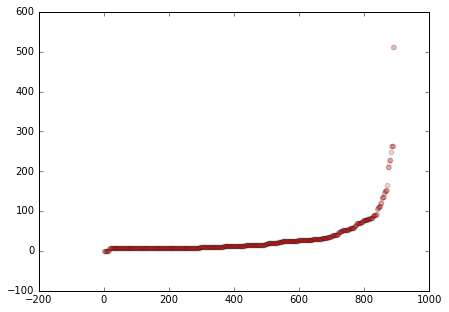

In [10]:
plt.figure(figsize=(7,5))
plt.scatter(x = titanic_df.index, y = titanic_df.Fare.sort_values(), c = 'red', alpha = 0.1);

Notice the semicolon (;) in the end of the previous statement. This is important if we want to supress unwanted output from the `plt.scatter` statement (and other similar statements).



As for the graph itself, we can see that the fare price seems to have been exponential in nature - vast majority of passengers paid less than \$100, while one passenger paid the then astronomical price of over \$500. 

When we examine a single numerical variable, we commonly want to estimate its distribution shape by drawing a histogram. Let's create one for the `Age` attribute.

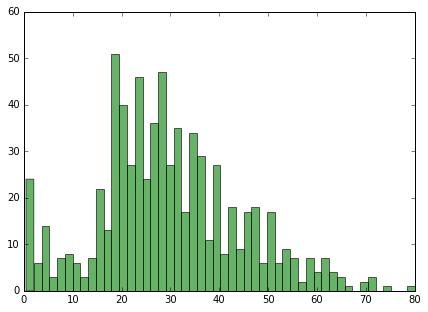

In [11]:
# we will create a histogram with a few additional parameters (number of bins, color and alpha)
plt.figure(figsize=(7,5))
plt.hist(titanic_df.Age.dropna(), bins = 50, facecolor = 'g', alpha = 0.6);


We can clearly see the distribution of ages which might be approximately normal, with the mean around 30. 

For categorical variables, we commonly use a bar plot. We need to do some pre-processing for this - we will first call the `value_counts` method of the `DataFrame` object which will calculate total numbers for each category, then we will sort the resulting `Series` by indexes, and finally plot it directly with the `plot` method setting the `kind` attribute as `bar` and providing a few additional parameters.

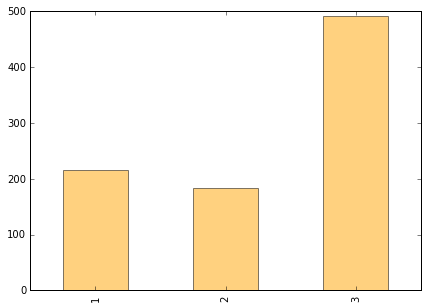

In [12]:
plt.figure(figsize=(7,5))
titanic_df.Pclass.value_counts().sort_index().plot(kind = 'bar', color = 'orange', alpha = 0.5);

Obviously, vast majority of the passengers were in the 3rd class, while the rest were relatively evenly split between 1st and second klass.

Another popular plot is the boxplot. Let's now do something more fancy and actually show the `Age` attribute split by a grid of two categorical variables - `Sex` and `Pclass`. For this we will call the wrapper method `boxplot` from the `DataFrame` object itself.

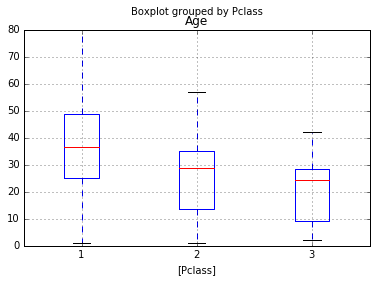

In [13]:
# boxplot is actually called as a DataFrame method
plt.figure(figsize=(7,5));
titanic_df.dropna().boxplot(column = 'Age',  by = ['Pclass'], return_type = "axes");



One drawback of the `matplotlib` library as that it is relatively low-level, meaning that to get the most out of its feature, you reakky have to understand the inner complexities and inner workings, especially concerning its synergy with the *Numpy* and *Pandas* libraries.

For example, let's say that we want to see how gender and passenger class related to the ultimate fate of the passenger. To show this, we fisrt need to adequately pre-preocess the data.

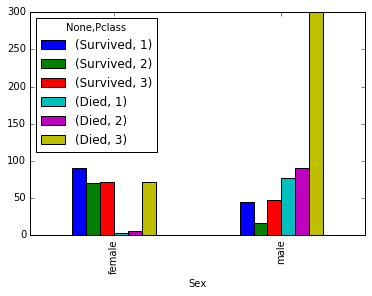

In [14]:
subframe = titanic_df[['Sex', 'Pclass', 'Survived']].copy()
subframe['Died'] = subframe.Survived == 0
subframe_group = subframe.groupby(['Sex', 'Pclass']).sum()
subframe_group.unstack().plot(kind='bar');

What the graph seems to show is that most victims by far were male passengers from the third passenger class, while most likely to survive were female passengers from the 1st and 2nd class. Of course we need to remember that this conclusion doesn't tkae into account the initial ratio of passengers - we need to remember that male 3rd class passengers were in the majority, so it was to be expected that they might have proportionally end up with most victims.'

We will here conclude our brief introduction to exploratory analysis. To unlock the full potential of the `matplotlib` package, reader is encouraged to check out the official `matplotlib` user's guide at <a href = "http://matplotlib.org/users/intro.html">[3]</a>. Also for some visualization alternatives, we can suggest checking out packages such as: 
- <a href = "http://bokeh.pydata.org/en/latest/">`Bokeh`</a> - a visualization library oriented towards web graphics 
- <a href = "http://stanford.edu/%7Emwaskom/software/seaborn/#">`Seaborn`</a> - a popular visualization library based on `matplotlib`
- <a href = "http://lightning-viz.org/">`Lightning`</a> - also a web-oriented visualization library
- <a href = "https://github.com/sirrice/pygg">`pygg`</a> - a Python wrapper for the extremely popular `ggplot2` visualization library from the `R` programming language

With this we conclude our introductory chapter of using Python for data analysis. 

<hr> <hr> <hr>
## <font color = "blue">Exercises

`1.` In the working directory of this notebook you will find three more datasets:
- iris.csv
- mtcars.csv
- diamonds.csv

All of these datasets are extremely popular in the data science community. Try applying what you have learned and perform a thorough exploratory analysis on these datasets. Remember to search the web for the metadata to gain understanding about the information contained within before embarking on the analysis itself.

<hr> <hr> <hr>

## Additional resources

<a name = "1"></a><a href = "https://www.kaggle.com/c/titanic">[1]</a> *Titanic: Machine learning from disaster*, Kaggle competition, last accessed 2016/09/06

<a name = "2"></a><a href = "http://pandas.pydata.org/pandas-docs/stable/api.html#series">[2]</a> *Series and Data Frame API Reference*, official Pandas documentation, last accessed 2016/09/06

<a name = "3"></a><a href = "http://matplotlib.org/users/intro.html">[3]</a> *Introduction to Matplotlib*, official *matplotlib*  documentation, last accessed 2016/09/07